# Prediction of Test Dataset

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pickle
from torchsummary import summary

from models import DLinkNet34, LinkNet34, FarSegNet
import data_loader
import loss
import tester

In [3]:
# root_path = 'D://Data/massachusetts-roads-dataset/'
root_path = '/home/renyan/ossdata/massachusetts-roads-dataset/'
road_path = root_path + "tiff_select3_parts_16/"
DIR_CHECKPOINT = 'checkpoints/'
TEST_SAVE_PATH = '/home/renyan/road-extraction/predict_result/'

In [17]:
INPUT_SIZE, OUTPUT_SIZE = 256, 256
# test_dataset = data_loader.RoadDataset(road_path, INPUT_SIZE, OUTPUT_SIZE, data_class = 'train',sample_ratio = 0.1)
test_dataset = data_loader.RoadDataset(road_path, INPUT_SIZE, OUTPUT_SIZE, data_class = 'test')

test dataset set: 784 pairs with sample ratio None


In [5]:
def tt_info(tt):
    nan0 = list(set(np.where(np.isnan(tt.dice_score))[0].tolist()).union(set(np.where(tt.dice_score == np.float32(0))[0].tolist())))
    print("{} pairs both whole black, {} pairs with one whole black".format(len(np.where(np.isnan(tt.dice_score))[0].tolist()),
                                                                           len(np.where(np.isnan(tt.dice_score))[0].tolist())))
    dice_score = [t for i, t in enumerate(tt.dice_score) if i not in nan0]
    iou_score = [t for i, t in enumerate(tt.iou_score) if i not in nan0]
    print("Finally: mean dice {}, mean iou {}".format(np.mean(dice_score), np.mean(iou_score)))

## LinkNet

In [6]:
# with open('pickle_objects/tt_linknet.pickle', 'rb') as f:  
#     tt_linknet = pickle.load(f)

In [13]:
net = LinkNet34.LinkNet34()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tt_linknet = tester.Tester(net = net, 
                   device = device, 
                   dir_stat = 'v2_linknet34_re_epoch20.pth', 
                   test_dataset = test_dataset,
                   threshold = 0.501,
                   save_path = TEST_SAVE_PATH, 
                   dir_checkpoint = DIR_CHECKPOINT)

Tester with net para in v2_linknet34_re_epoch20.pth is ready 
(threshold = 0.501, 7056 pairs in test dataset)


In [14]:
tt_linknet.test_score()

100%|██████████| 7056/7056 [21:36<00:00,  5.44it/s]

current threshold: 0.501
mean dice: 0.7945294249965986
mean iou: 0.694017821418542


In [27]:
tt_info(tt_linknet)

0 pairs both whole black, 0 pairs with one whole black
Finally: mean dice 0.7945294249965986, mean iou 0.694017821418542


In [27]:
# tt = tt_linknet
# print(np.where(tt.dice_score <= np.quantile(tt.dice_score, 0.05)), '\n',
#      np.where(tt.iou_score <= np.quantile(tt.iou_score, 0.05)))
# print(np.where(tt.dice_score >= np.quantile(tt.dice_score, 0.95)), '\n',
#      np.where(tt.iou_score >= np.quantile(tt.iou_score, 0.95)))

In [28]:
# tt_linknet.test_idx(706)

In [33]:
# tt_linknet.save(subfolder = "test_result/linknet34_re_epoch20/")

100%|██████████| 784/784 [00:01<00:00, 538.13it/s]


In [15]:
tt_linknet.test_dataset = None
tt_linknet.test_loader = None
with open('pickle_objects/tt_linknet_train.pickle','wb') as p:
    pickle.dump(tt_linknet, p)

## D-LinkNet

In [16]:
# with open('pickle_objects/tt_dlinknet.pickle', 'rb') as f:  
#     tt_dlinknet = pickle.load(f)

In [17]:
net = DLinkNet34.DLinkNet34()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tt_dlinknet = tester.Tester(net = net, 
                   device = device, 
                   dir_stat = 'v2_dlinknet34_re_epoch20.pth', 
                   test_dataset = test_dataset,
                   threshold = 0.503,
                   save_path = TEST_SAVE_PATH, 
                   dir_checkpoint = DIR_CHECKPOINT)

Tester with net para in v2_dlinknet34_re_epoch20.pth is ready 
(threshold = 0.503, 7056 pairs in test dataset)


In [ ]:
tt_dlinknet.test_score()

 10%|▉         | 681/7056 [01:45<15:41,  6.77it/s]  

In [28]:
tt_info(tt_dlinknet)

0 pairs both whole black, 0 pairs with one whole black
Finally: mean dice 0.8173042396111623, mean iou 0.7269717835440095


In [ ]:
# tt_dlinknet.save(subfolder = "test_result/dlinknet34_re_epoch20/")

In [ ]:
tt_dlinknet.test_dataset = None
tt_dlinknet.test_loader = None
with open('pickle_objects/tt_dlinknet_train.pickle','wb') as p:
    pickle.dump(tt_dlinknet, p)

## FarSeg Net

In [ ]:
# with open('pickle_objects/tt_farseg.pickle', 'rb') as f:  
#     tt_farseg = pickle.load(f)

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = FarSegNet.FarSegNet().to(device)
tt_farseg = tester.Tester(net = net, 
                   device = device, 
                   dir_stat = 'v2_farseg_epoch1.pth', 
                   test_dataset = test_dataset,
                   threshold = 0.5,
                   save_path = TEST_SAVE_PATH, 
                   dir_checkpoint = DIR_CHECKPOINT)

Tester with net para in v2_farseg_epoch1.pth is ready 
(threshold = 0.5, 784 pairs in test dataset)


In [61]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# net = FarSegNet.FarSegNet().to(device)
# choices = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# iou = []
# miou = []
# dice = []
# mdice = []
# for choice in choices:
#     print("==========================={}===============================".format('v2_farseg_epoch{}.pth'.format(choice)))
#     tt_farseg = tester.Tester(net = net, 
#                    device = device, 
#                    dir_stat = 'v2_farseg_epoch{}.pth'.format(choice), 
#                    test_dataset = test_dataset,
#                    threshold = 0.5,
#                    save_path = TEST_SAVE_PATH, 
#                    dir_checkpoint = DIR_CHECKPOINT)
#     tt_farseg.test_score()
#     iou.append(tt_farseg.iou_score)
#     dice.append(tt_farseg.dice_score)
#     miou.append(np.mean(tt_farseg.iou_score))
#     mdice.append(np.mean(tt_farseg.dice_score))

In [18]:
# train
iou_test, miou_test, dice_test, mdice_test = iou, miou, dice, mdice
print(miou_test,'\n\n', mdice_test)

[0.6729336445167297, 0.777787685151879, 0.7982560034844601, 0.8218564088545501, 0.8291713015629633, 0.8427011937619656, 0.851973872920102, 0.8622694465708225, 0.8672758288100256, 0.8730108699054583, 0.8758657856613187] 

 [0.7826779535322345, 0.8585560946020212, 0.8720983121453302, 0.8887904473482995, 0.893429238642054, 0.9013797315129852, 0.9072806466385682, 0.914395882728252, 0.9169580575633556, 0.9207907549878385, 0.9222991469058585]


In [31]:
# test
iou_test, miou_test, dice_test, mdice_test = iou, miou, dice, mdice
print(miou_test,'\n\n', mdice_test)

[0.5431574471162856, 0.5690857675815005, 0.5640924537465859, 0.5656684629570918, 0.5621636257777279, 0.5572889346566753, 0.5621982093781165, 0.567335149794045, 0.5689174415820061, 0.5563551494270398, 0.5677939570489833] 

 [0.625859295165807, 0.6500142926313013, 0.6490594088513609, 0.6524386154624324, 0.6506615665028833, 0.6496824057256178, 0.6509772765972326, 0.6552235690672562, 0.6549238965644174, 0.6482370506507522, 0.6546419067588063]


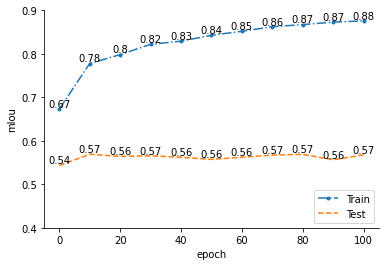

In [60]:
x = list(np.arange(0, 110, 10))

fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot(x, miou_train, '.-.')
plt.plot(x, miou_test, '--')
plt.xlabel("epoch")
plt.ylabel("mIou")
plt.ylim(0.4, 0.9)
plt.legend(['Train', 'Test'], loc='lower right')

for a, b in zip(x, miou_train):
    plt.text(a, b, b.round(2), ha='center', va='bottom', fontsize=10)
for a, b in zip(x, miou_test):
    plt.text(a, b, b.round(2), ha='center', va='bottom', fontsize=10)

# plt.title("mIou Score of different FarSeg epochs")
plt.savefig("predict_result/mid_report/epoch_line.png")

In [13]:
tt_farseg.test_score()

100%|██████████| 784/784 [01:46<00:00,  7.34it/s]

current threshold: 0.5
mean dice: 0.625859295165807
mean iou: 0.5431574471162856


In [7]:
tt_info(tt_farseg)

0 pairs both whole black, 0 pairs with one whole black
Finally: mean dice 0.8728935287666232, mean iou 0.7973545283597118


In [ ]:
# tt_farseg.save(subfolder = "test_result/farseg_re_epoch33/")

In [ ]:
tt_farseg.test_dataset = None
tt_farseg.test_loader = None
with open('pickle_objects/tt_farseg_train.pickle','wb') as p:
    pickle.dump(tt_farseg, p)

## Save Results

In [20]:
# for t in np.arange(0.497, 0.503, 0.001):
#     tt.set_threshold(t)
#     tt.test_score()
#     tt.write_info("D-Linknet34")

In [7]:
tt.pred.max()

tensor(1., device='cuda:0')

In [ ]:
tt.set_threshold(0.9)
tt.test_score()
tt.write_info("D-Linknet34")

In [23]:
tt.save(subfolder = "test_result/dlinknet34_re_epoch20/")

  8%|▊         | 61/784 [00:00<00:01, 601.71it/s]

Build folder of /home/renyan/road-extraction/predict_result/test_result/dlinknet34_re_epoch20/


100%|██████████| 784/784 [00:01<00:00, 596.18it/s]


## Good & Bad Prediction Examples

In [8]:
len(tt.pred_list)

784

In [9]:
print(np.where(tt.dice_score >= np.quantile(tt.dice_score, 0.95)), '\n',
     np.where(tt.iou_score >= np.quantile(tt.iou_score, 0.95)))

(array([  3,  36,  37,  44,  52,  64,  78,  79,  80,  99, 125, 142, 152,
       205, 207, 223, 226, 241, 248, 250, 252, 264, 268, 283, 297, 300,
       301, 326, 327, 331, 332, 335, 341, 510, 514, 540, 564, 573, 669,
       769]),) 
 (array([  3,  36,  37,  44,  52,  64,  78,  79,  80,  99, 125, 142, 152,
       205, 207, 223, 226, 241, 248, 250, 252, 264, 268, 283, 297, 300,
       301, 326, 327, 331, 332, 335, 341, 510, 514, 540, 564, 573, 669,
       769]),)


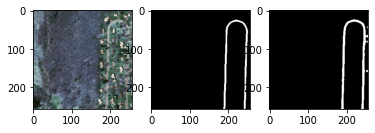

In [11]:
# good prediction
tt.test_idx(78, combine = False)

In [62]:
# print(np.where(tt.dice_score == np.min(tt.dice_score)), '\n', np.where(tt.iou_score == np.min(tt.iou_score)))

In [51]:
# tt_linknet.test_idx(6, combine = False)